In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=512)
trainloader1 = torch.utils.data.DataLoader(trainset, batch_size=len(trainset))
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset))
testloader_display= torch.utils.data.DataLoader(testset, batch_size=1)

In [7]:
class Network(nn.Module):#Extends all features of Module(bulit in class)to oyr network class
    def __init__(self):#Defines the type of layers as part of the object
        super(Network,self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=(1,1))
        self.conv2=nn.Conv2d(in_channels=6,out_channels=10,kernel_size=5,stride=(1,1))
        
        self.fc1=nn.Linear(in_features=10*4*4,out_features=90)
        self.out=nn.Linear(in_features=90,out_features=10)
    
    
    def forward(self,t):
        #Conv layer 1
        t=self.conv1(t)#Implements the forward pass through predefined functions in the nn.Module class
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        #Conv layer 2
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        #Fc layer 1
        t=t.reshape(-1,10*4*4)
        t=self.fc1(t)
        t=F.relu(t)
        
        #Final softmax layer
        t=self.out(t)
        #t=F.softmax(t,dim=1),No need to do this cross entropy does it by itself
        
        return t

In [4]:
#net=Network()
'''net=torch.load('ConvNet MNIST.pth')
net.eval()'''

In [5]:
#optimizer=optim.Adam(net.parameters(),lr=0.01)

In [8]:
def execute(num_iter):
    costs=[]
    for epoch in range(num_iter):
        for batch in trainloader1:
            images,labels=batch
            
            pred=net(images)
            
            loss=F.cross_entropy(pred,labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #print("Cost after batch process:"+str(loss.item()))
        print("Cost after epoch "+str(epoch)+":"+str(loss.item()))   
        costs.append(loss.item())
               
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.show()        

In [7]:
#execute(200)

Cost after epoch 0:2.3054964542388916
Cost after epoch 1:2.293219804763794
Cost after epoch 2:2.268216609954834
Cost after epoch 3:2.2244436740875244
Cost after epoch 4:2.1472344398498535
Cost after epoch 5:2.0216660499572754
Cost after epoch 6:1.830710530281067
Cost after epoch 7:1.5701905488967896
Cost after epoch 8:1.2583039999008179
Cost after epoch 9:0.9555940628051758
Cost after epoch 10:0.7416338324546814
Cost after epoch 11:0.722425639629364
Cost after epoch 12:0.6506757736206055
Cost after epoch 13:0.611083984375
Cost after epoch 14:0.5382680892944336
Cost after epoch 15:0.5135846138000488
Cost after epoch 16:0.4899730682373047
Cost after epoch 17:0.4288206398487091
Cost after epoch 18:0.42538076639175415
Cost after epoch 19:0.40435150265693665
Cost after epoch 20:0.37744593620300293
Cost after epoch 21:0.3591255247592926
Cost after epoch 22:0.35034775733947754
Cost after epoch 23:0.33173438906669617
Cost after epoch 24:0.3085155487060547
Cost after epoch 25:0.2987199127674103

KeyboardInterrupt: 

In [17]:
b1=next(iter(trainloader1))
i1,l1=b1
p1=net(i1)
print(p1.argmax(dim=1))
a_train=p1.argmax(dim=1).eq(l1).sum()

tensor([3, 0, 4,  ..., 5, 6, 8])


In [18]:
print("Accuracy on train set:"+str(int(a_train)/len(trainset)))

Accuracy on train set:0.9856


In [19]:
b=next(iter(testloader))
i,l=b
p_test=net(i)
print(p_test.argmax(dim=1))
a_test=p_test.argmax(dim=1).eq(l).sum()
#print(a_test)

tensor([7, 2, 1,  ..., 4, 5, 6])
tensor(9795)


In [20]:
print("Accuracy on test set:"+str(int(a_test)/len(testset)))

Accuracy on test set:0.9795


In [43]:
#Checking what was predicted as what......
def show(index):
    i=0
    for batch in testloader_display:
        if i==index:
            img,label=batch
            plt.imshow(img.squeeze(),cmap='gray')#.squeeze is required to change img dimensions from (1,28,28) to (28,28)
            print('Prediction:'+str(int(p_test.argmax(dim=1)[i])))
            print('Actual:'+str(int(label)))
            break
        elif i<index:
            i+=1

Prediction:1
Actual:1


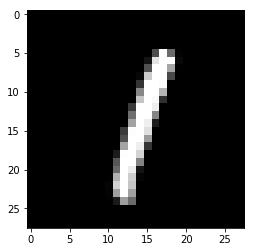

In [34]:
show(5)

In [37]:
torch.save(net,'ConvNet MNIST.pth')

In [16]:
cnn=torch.load('ConvNet MNIST.pth')
cnn.eval()

Network(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=160, out_features=90, bias=True)
  (out): Linear(in_features=90, out_features=10, bias=True)
)

In [39]:
b=next(iter(testloader))
i,l=b
p=cnn(i)
print(p.argmax(dim=1))
a_test=p.argmax(dim=1).eq(l).sum()
print(a_test)

tensor([7, 2, 1,  ..., 4, 5, 6])
tensor(9738)
